In [1]:
import pandas as pd


In [2]:
dataset=pd.read_csv("Pre_processed_Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


In [4]:
dataset.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [5]:
 import seaborn as sns
    

C:\Users\rajah\anaconda3\envs\pugazh\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


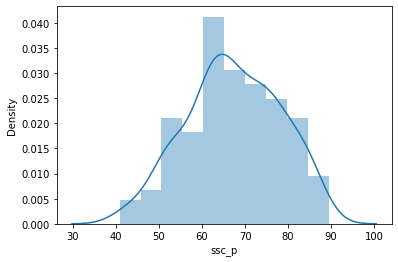

In [6]:
sns.distplot(dataset["ssc_p"])

In [7]:
#density curve. Histogram

In [8]:
#what is the probability of getting mark 70 to 70
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
     # inbuilt function for normal distribution so we import this library
    from scipy.stats import norm
    import seaborn as sns
     #In distplot kde(Kernel density function)=True the curve will display
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    #axvline is vertical line startrange and the color is red
    pyplot.axvline(startrange,color='Red')
    #axvline is vertical line startrange and the color is red
    pyplot.axvline(endrange,color='Red')
    #Until this line the graph is created
    #Below lines for calculation
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    #inbuilt normal distribution function
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
     #advantage of below line is in single line the output is converted into list it is called oneliner for loop
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=67.303, Standard Deviation=10.827
The area between range(70,70):0


C:\Users\rajah\anaconda3\envs\pugazh\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


0

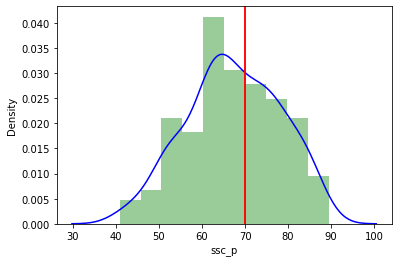

In [9]:
get_pdf_probability(dataset["ssc_p"],70,70)

In [10]:
!pip install seaborn

In [11]:
!pip install statsmodels

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(80)

0.8651162790697674

# Standard_Normal_Density

In [13]:
def stdNBgraph(dataset):
   # Coverted to standard Normal Distribution
    import seaborn as sns
    #mean and std calculation
    mean=dataset.mean()
    std=dataset.std()
    #Oneliner advantage of oneliner is in single line the output is converted into list 
    values=[i for i in dataset]
    #formula calculation
    z_score=[((j-mean)/std) for j in values]
    #kde(Kernel density function )=True the curve is dislayed
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)
    #z_score.std()


C:\Users\rajah\anaconda3\envs\pugazh\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == '':


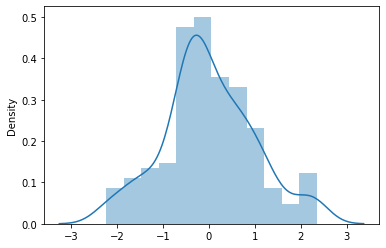

In [14]:
stdNBgraph(dataset["hsc_p"])